In [170]:
import numpy as np
import scipy as sp
import cv2 as cv
from matplotlib import pyplot as plt
import os
from scipy import ndimage
from scipy.ndimage.filters import gaussian_filter1d
import pytesseract

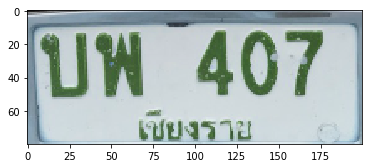

In [171]:
x = cv.imread('./cars/positive/S_8167621046436_013.jpg')
x = cv.resize(x,(200,80))
plt.imshow(x)

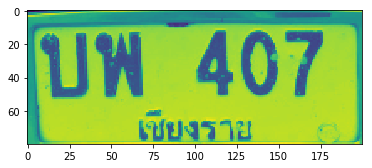

In [172]:
gray = cv.cvtColor(x,cv.COLOR_BGR2GRAY)
plt.imshow(gray)

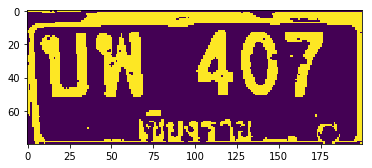

In [173]:
adaptive = cv.adaptiveThreshold(gray,
                                 255,
                                 cv.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 cv.THRESH_BINARY_INV,
                                31,5)
# ret,adaptive = cv.threshold(gray,150,255, cv.THRESH_BINARY)
plt.imshow(adaptive)

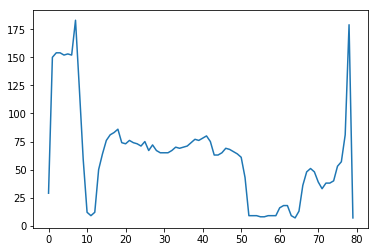

In [174]:
adaptive1 = adaptive/255
hist = adaptive1.sum(1)
plt.plot(hist)

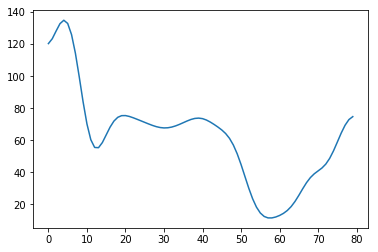

In [175]:
hist2 = gaussian_filter1d(hist,3)
plt.plot(hist2)
minHist = np.argmin(hist2)

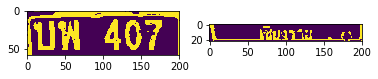

In [176]:
plt.subplot(1,2,1)
plt.imshow(adaptive[:minHist,:])
plt.subplot(1,2,2)
plt.imshow(adaptive[minHist:,:])

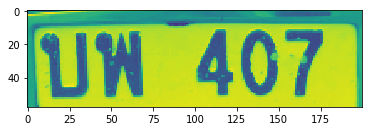

In [177]:
im1 = np.copy(gray[:minHist,:])
im2 = np.copy(gray[minHist:,:])
plt.imshow(im1)

In [178]:
pytesseract.image_to_string(im1, lang='tha+eng', boxes=False,
                            config='--psm 10 --oem 1')

'บพ 407'

In [179]:
pytesseract.image_to_string(im2, lang='tha+eng', boxes=False,
                            config='--psm 10 --oem 1')

'| เชียงราย ”)'

In [180]:
pytesseract.image_to_string(x, lang='tha+eng', \
        config='--psm 13 --oem 1')

'UW 407 |'

In [266]:
im1 = np.copy(adaptive[:minHist,:]) 
im2 = np.copy(adaptive[minHist:,:])

In [267]:
labels,num = ndimage.label(im1)

In [268]:
labels,num

(array([[1, 1, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 3, 3, 3],
        [0, 0, 0, ..., 3, 3, 3],
        ...,
        [3, 3, 0, ..., 3, 3, 3],
        [3, 3, 0, ..., 3, 3, 3],
        [3, 3, 0, ..., 3, 3, 3]]), 9)

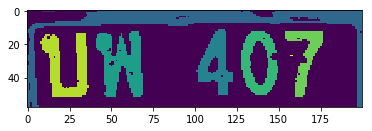

In [269]:
plt.imshow(labels)

In [270]:
objs = ndimage.find_objects(labels,num)

In [271]:
objs

[(slice(0, 2, None), slice(0, 17, None)),
 (slice(0, 1, None), slice(18, 32, None)),
 (slice(1, 58, None), slice(0, 200, None)),
 (slice(12, 51, None), slice(101, 123, None)),
 (slice(13, 52, None), slice(41, 69, None)),
 (slice(13, 51, None), slice(128, 150, None)),
 (slice(13, 52, None), slice(154, 177, None)),
 (slice(14, 52, None), slice(8, 37, None)),
 (slice(27, 28, None), slice(157, 159, None))]

In [272]:
j = 0
for i in objs :
    j+=1
    if labels[i].size <25 or labels[i].size > 1500 :
        for x in range(len(labels[i])) :
            for y in range (len(labels[i][x])) :
                if(labels[i][x][y] == j) :
                    labels[i][x][y] = 0
        

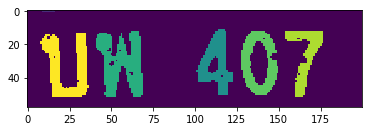

In [273]:
plt.imshow(labels)

In [274]:
pytesseract.image_to_string(labels, lang='tha+eng', boxes=False,
                            config='--psm 10 --oem 1')

'บพ 407'